In [5]:
import numpy as np
import pandas as pd

# нужно разбить цены на данные классы - тут мы разбиваем (гы)
classes =  [(0, 400),
            (400, 800),
            (800, 6000)]

dataset = pd.read_csv('resources/new_mobile.csv', sep=',')
price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories
# берём только те колонки которые извлекли в 4 лабе
dataset = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны', 'Категория цены']]

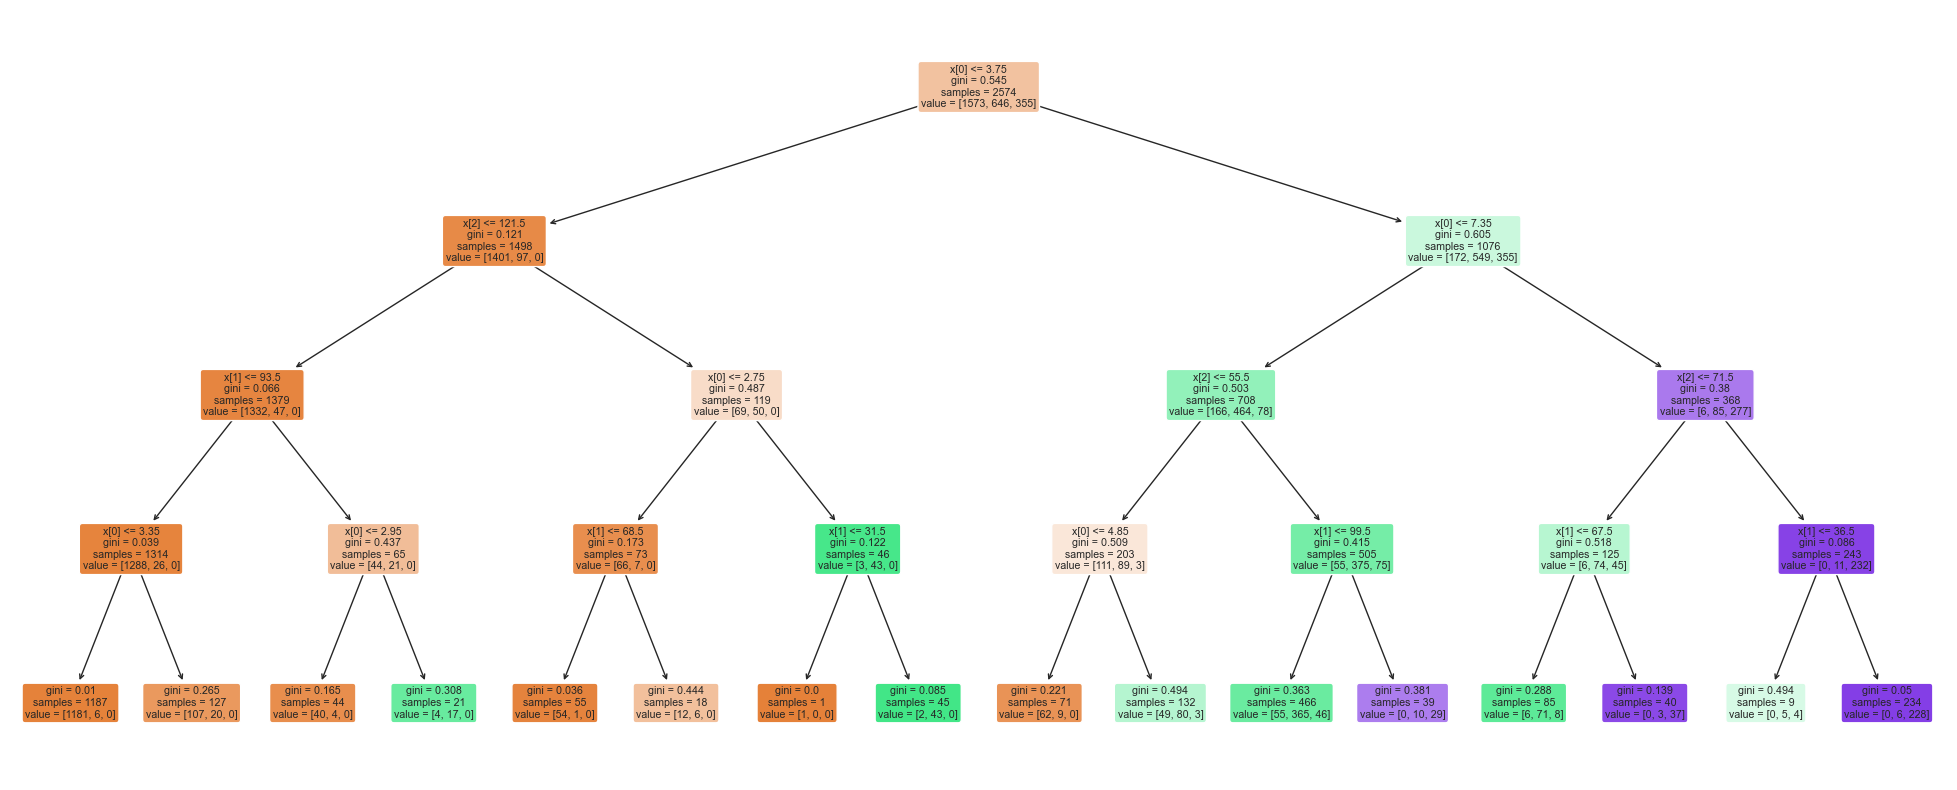

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree# модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = dataset[['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны']]
y = dataset[['Категория цены']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) #разбиваем выборку на обучающую и тестовую # тестируем для другой точки

tree = DecisionTreeClassifier(max_depth=4, criterion='gini') # создаем классификатор на основе дерева
clf = tree.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True,rounded=True)
plt.show()

[0 0 0 ... 0 0 1]


Text(0.5, 1.1, 'Confusion matrix decision tree')

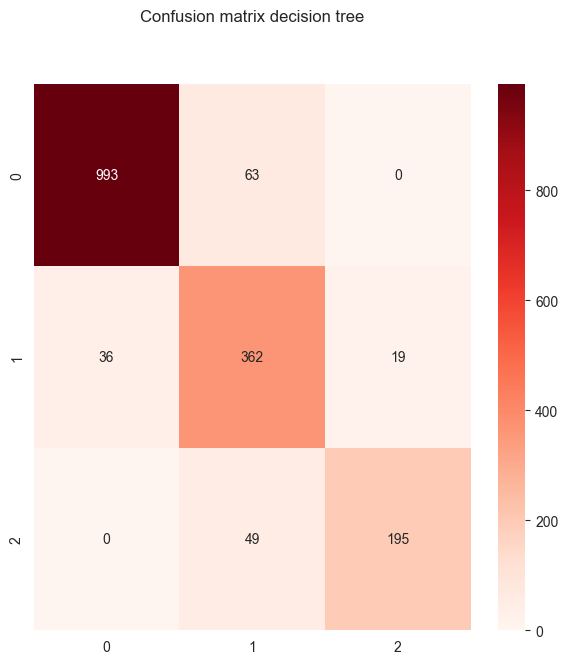

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (6,6))
ax = fig.gca()
# матрица неточности
y_score=clf.predict(X_test)
print(y_score)

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)